In [1]:
import os
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'apptreason.xlsx',
 'April.png',
 'data',
 'Data Storytelling Visualizations.ipynb',
 'deindentified_medical_practice_data.xlsx',
 'Dr2Kids_MOC_project.ipynb',
 'February.png',
 'January.png',
 'July.png',
 'June.png',
 'March.png',
 'May.png',
 'NewReport_tandon MOC Project .xlsx',
 'sick_status_stacked_by_month_001.png',
 'sick_type_stacked.png',
 'status_stacked_by_age.png',
 'status_stacked_by_age_jan_jun.png',
 'status_stacked_by_month.png',
 'status_stacked_by_month_002.png',
 'trends_line_001.png',
 'type_stacked_by_age.png',
 'type_stacked_by_age_jan_june.png',
 'type_stacked_by_month.png',
 'well_status_stacked_by_month_001.png']

In [3]:
df = pd.read_excel('deindentified_medical_practice_data.xlsx', index_col = 0)
df.head()

,patientaccno,appttype,apptreason,apptstatus,dos,apptstarttime,age
0,103312,OV 15,Immunization only,Rescheduled,2020-01-01,2020-01-01 09:45:00,12
1,107740,OV 15,physical and immunizations,Seen in office,2020-01-02,2020-01-02 08:30:00,4
2,106690,OV 15,Sick,No Show,2020-01-02,2020-01-02 08:30:00,18
3,107849,OV 15,Follow up,Seen in office,2020-01-02,2020-01-02 08:45:00,10
4,108437,OV 15,Immunization only,Cancelled,2020-01-02,2020-01-02 08:45:00,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3089 entries, 0 to 3090
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   patientaccno   3089 non-null   object        
 1   appttype       3089 non-null   object        
 2   apptreason     3077 non-null   object        
 3   apptstatus     3089 non-null   object        
 4   dos            3089 non-null   datetime64[ns]
 5   apptstarttime  3089 non-null   datetime64[ns]
 6   age            3089 non-null   int64         
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 193.1+ KB


In [5]:
from matplotlib.colors import LinearSegmentedColormap

colors = ['xkcd:turquoise blue', 'xkcd:orangey yellow', 'xkcd:avocado', 'xkcd:orange']
cm = LinearSegmentedColormap.from_list('PoweropintSet1', colors)
colors2 = ['xkcd:orange', 'xkcd:avocado', 'xkcd:orangey yellow', 'xkcd:turquoise blue']
cm2 = LinearSegmentedColormap.from_list('PoweropintSet2', colors2)

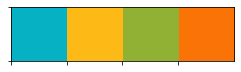

In [25]:
pp_palette = sns.palplot(sns.color_palette(colors))

In [6]:
g = pd.Grouper(key='dos',freq='2W')
df_resampled = df.groupby([g,'apptstatus'])['patientaccno'].count()
df_resampled = df_resampled.unstack(fill_value=0)
df6m_resamp = df_resampled.iloc[:13]
df6m_resamp

apptstatus,Cancelled,No Show,Rescheduled,Seen in office
dos,,,,
2020-01-05,4,2,19,44
2020-01-19,13,12,61,138
2020-02-02,11,14,72,176
2020-02-16,13,11,77,154
2020-03-01,29,15,71,152
2020-03-15,32,18,43,151
2020-03-29,29,2,96,20
2020-04-12,30,12,94,91
2020-04-26,16,10,79,88


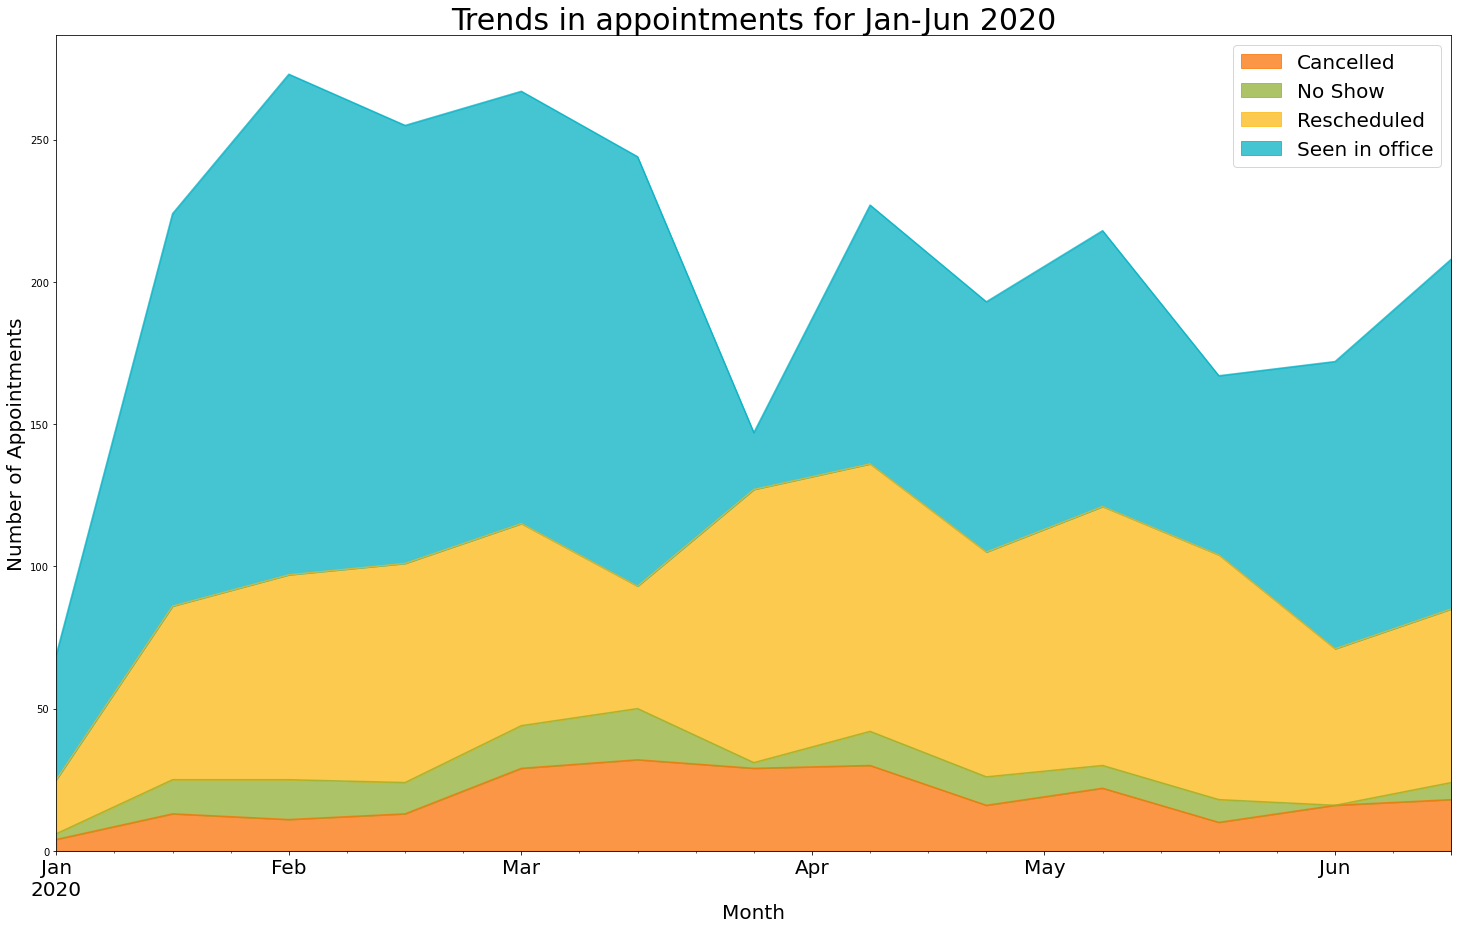

In [7]:
_ = df6m_resamp.plot(kind='area', figsize=(25,15), colormap=cm2, alpha=0.75)
_ = plt.title('Trends in appointments for Jan-Jun 2020', fontsize=30)
_ = plt.xlabel('Month', fontsize=20)
_ = plt.ylabel('Number of Appointments', fontsize=20)
_ = plt.xticks(fontsize=20)
_ = plt.legend(fontsize=20)

plt.savefig('data/trends_line_002.png')

In [29]:
df1 = df.copy()
df1['dos_month'] = df1['dos'].dt.month.astype(str)
df1.head()

,patientaccno,appttype,apptreason,apptstatus,dos,apptstarttime,age,dos_month
0,103312,OV 15,Immunization only,Rescheduled,2020-01-01,2020-01-01 09:45:00,12,1
1,107740,OV 15,physical and immunizations,Seen in office,2020-01-02,2020-01-02 08:30:00,4,1
2,106690,OV 15,Sick,No Show,2020-01-02,2020-01-02 08:30:00,18,1
3,107849,OV 15,Follow up,Seen in office,2020-01-02,2020-01-02 08:45:00,10,1
4,108437,OV 15,Immunization only,Cancelled,2020-01-02,2020-01-02 08:45:00,4,1


In [62]:
df2 = df1[~df1['dos_month'].isin(['7','8'])]
df2.dos_month.unique()

array(['1', '2', '3', '4', '5', '6'], dtype=object)

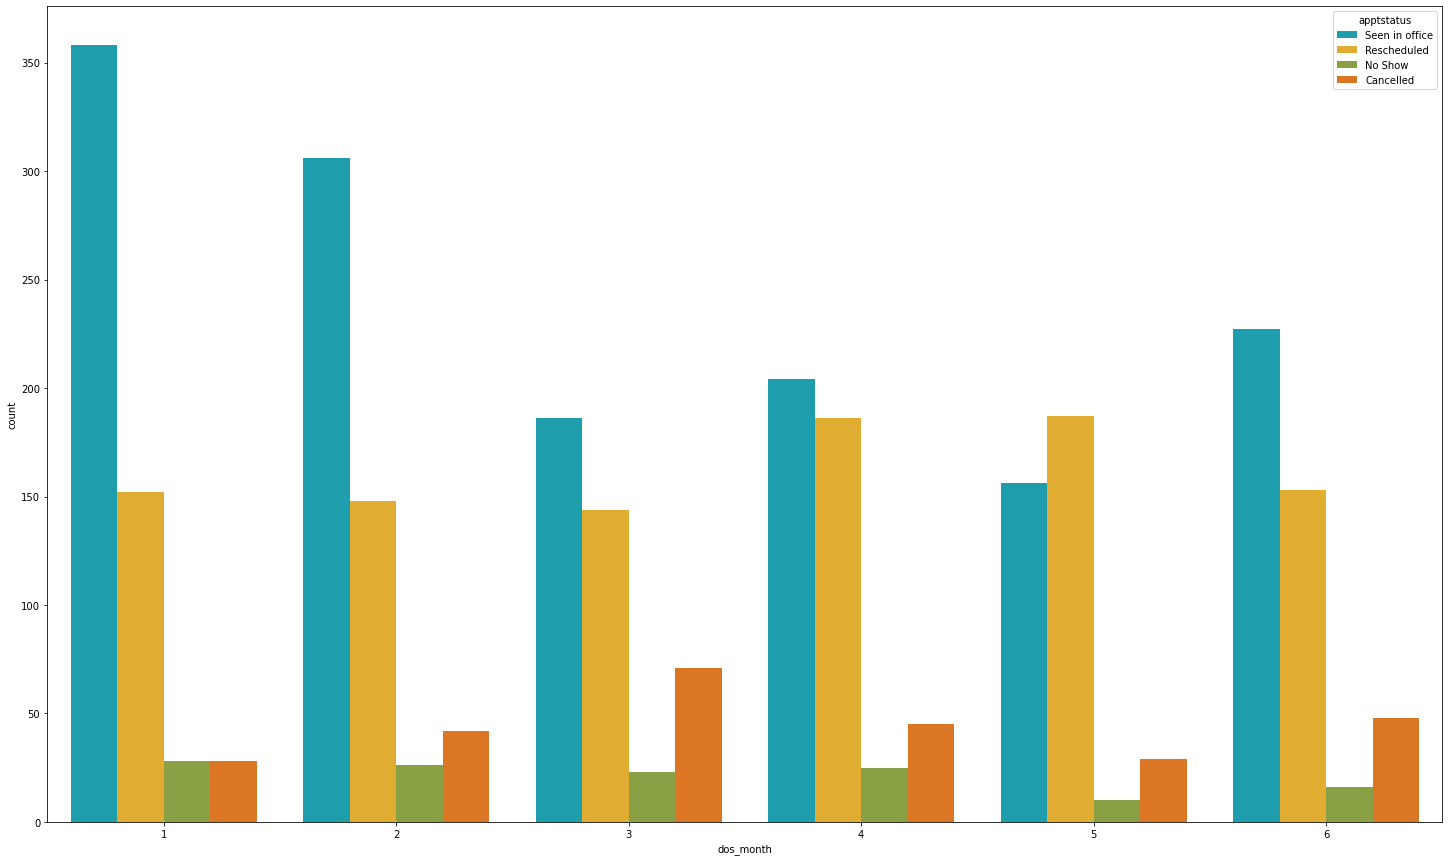

In [146]:
fig, ax = plt.subplots(figsize=(25,15))

pp = dict(zip(list(df['apptstatus'].unique()),
              ['xkcd:orangey yellow','xkcd:turquoise blue','xkcd:avocado','xkcd:orange']))

ax = sns.countplot(x='dos_month',hue='apptstatus', hue_order=['Seen in office', 'Rescheduled', 'No Show','Cancelled'],
                                                          data=df2, palette=pp)

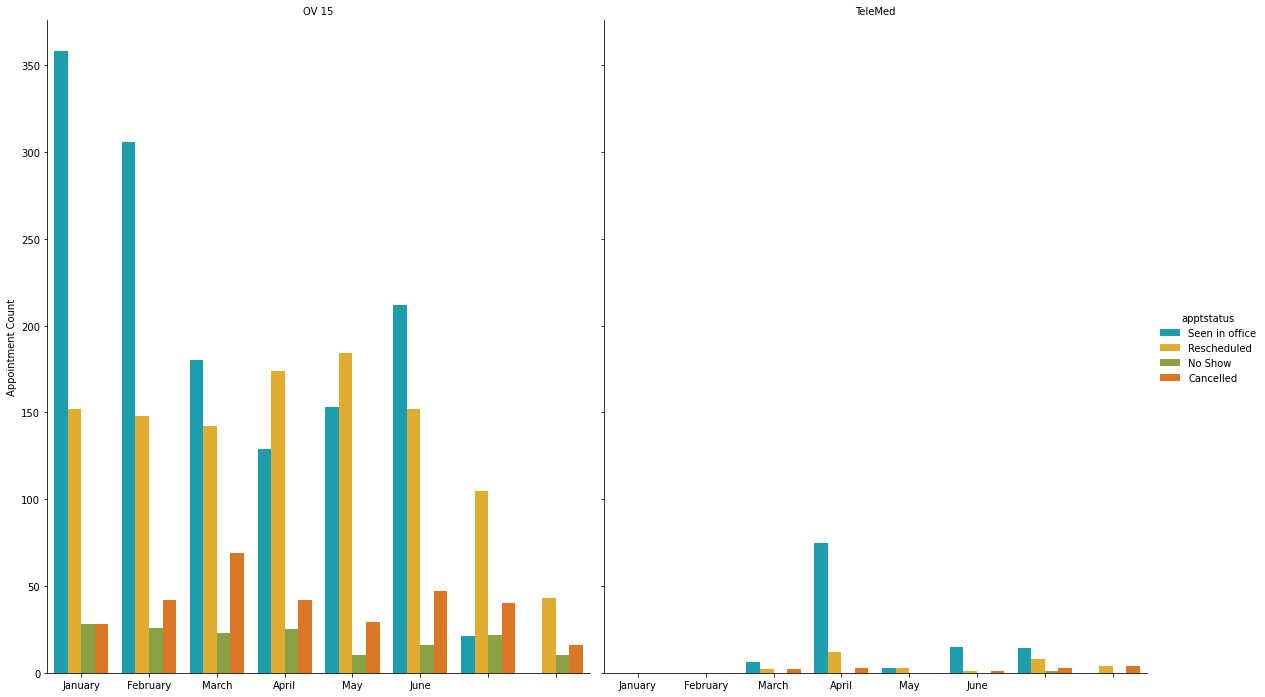

In [246]:
months = ['January','February','March','April','May','June']
g = sns.catplot(x='dos_month',hue='apptstatus',col='appttype',data=df2,kind='count',
                hue_order=['Seen in office', 'Rescheduled', 'No Show','Cancelled'],
                palette=pp, saturation=0.75, height=10, aspect=.8)
_ = (g.set_axis_labels("", "Appointment Count")
  .set_xticklabels(months)
  .set_titles("{col_name}"))

plt.savefig('data/type_by_status_by_month_001.png')

In [103]:
status_by_m = pd.DataFrame(df1['apptstatus'].groupby(by=df1['dos_month']).value_counts(ascending=False))
status_by_m
sbm = status_by_m.unstack(fill_value=0)
sbm.columns = sbm.columns.droplevel(0)
sbm = sbm.drop(['7','8'])
sbm = sbm[['Seen in office', 'Rescheduled', 'No Show','Cancelled']]
sbm

apptstatus,Seen in office,Rescheduled,No Show,Cancelled
dos_month,,,,
1,358,152,28,28
2,306,148,26,42
3,186,144,23,71
4,204,186,25,45
5,156,187,10,29
6,227,153,16,48


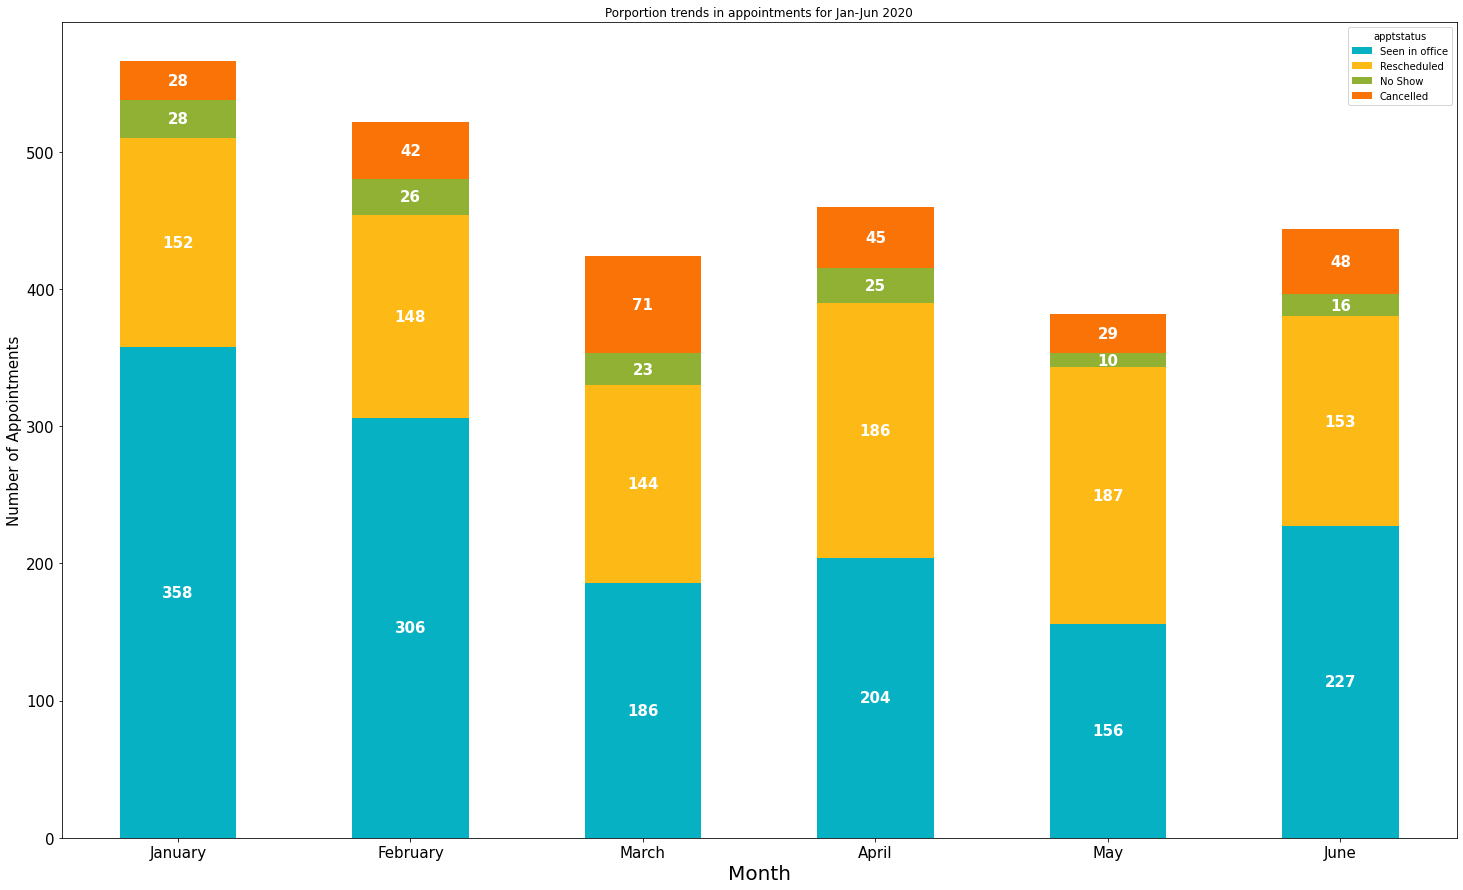

In [247]:
ax = sbm.plot.bar(stacked=True, colormap=cm, rot=0, fontsize=15, figsize=(25,15))
_ = ax.set_xlabel('Month', fontsize=20)
_ = ax.set_ylabel('Number of Appointments', fontsize=15)
_ = ax.set_title('Porportion trends in appointments for Jan-Jun 2020')
_ = ax.set_xticklabels(months)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='white', fontsize=15, fontweight='bold')

plt.savefig('data/stacked_by_month_001.png')

In [120]:
month_by_s = pd.DataFrame(df1['dos_month'].groupby(by=df1['apptstatus']).value_counts(ascending=False))
month_by_s
mbs = month_by_s.unstack(fill_value=0)
mbs.columns = mbs.columns.droplevel(0)
mbs = mbs.drop(['7','8'],axis=1)
mbs = mbs.loc[['Seen in office', 'Rescheduled', 'No Show','Cancelled']]
mbs

dos_month,1,2,3,4,5,6
apptstatus,,,,,,
Seen in office,358,306,186,204,156,227
Rescheduled,152,148,144,186,187,153
No Show,28,26,23,25,10,16
Cancelled,28,42,71,45,29,48


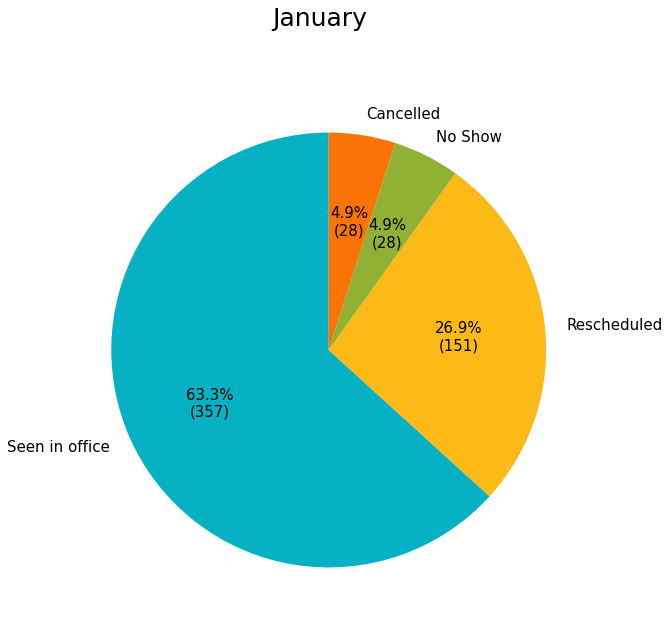

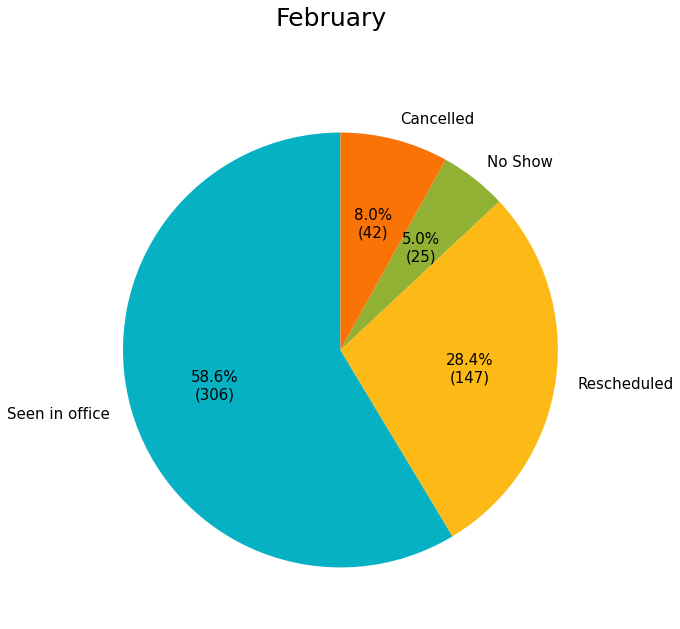

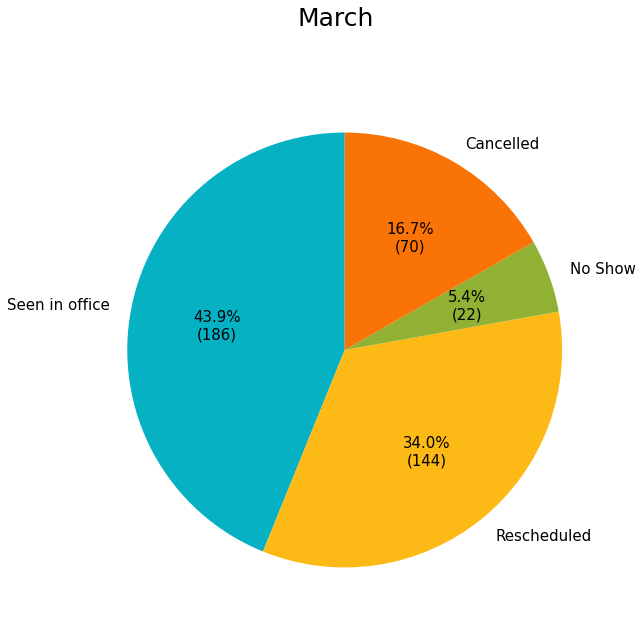

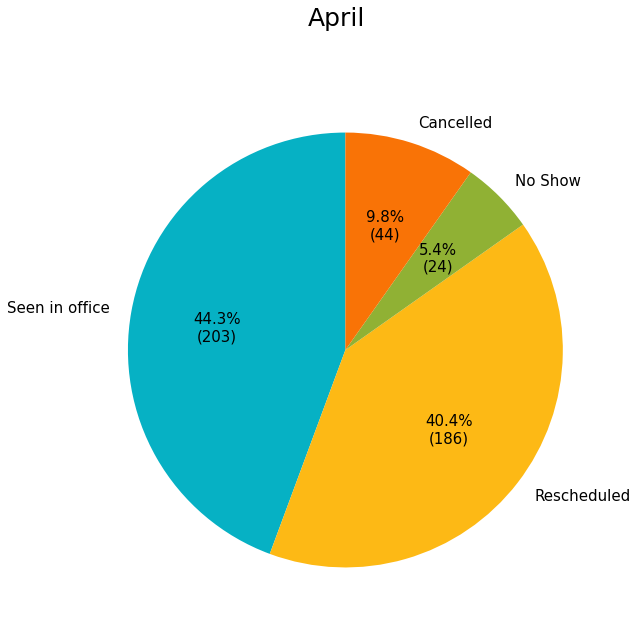

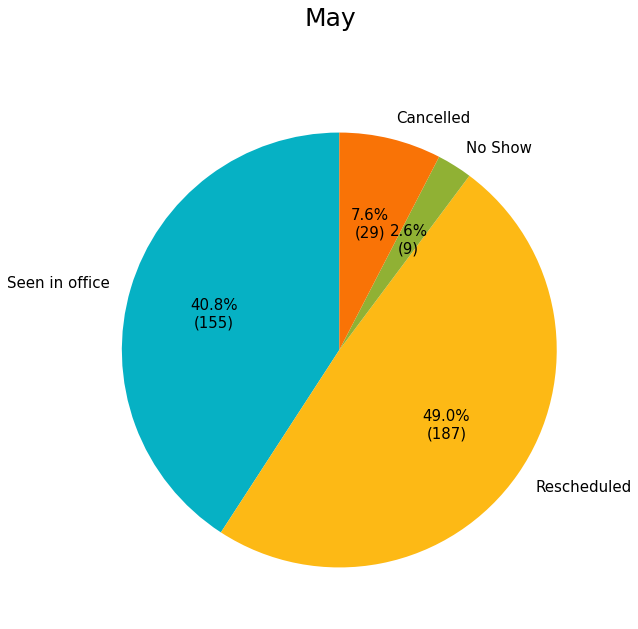

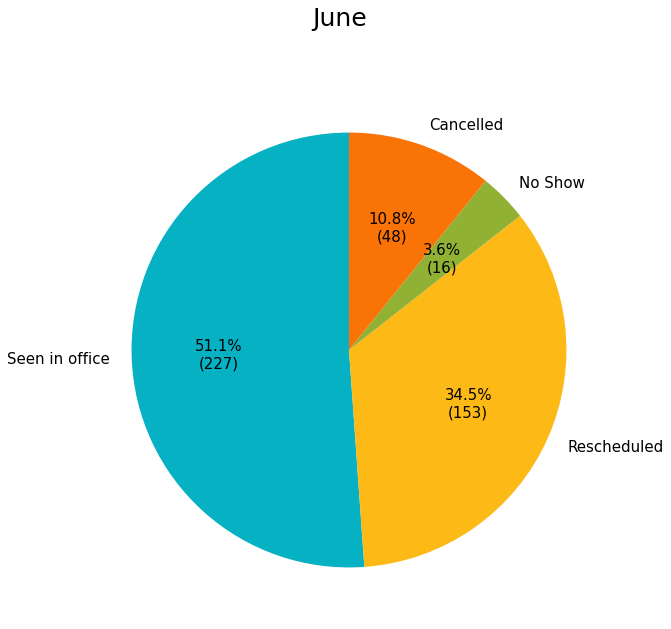

In [248]:
months = ['January','February','March','April','May','June']
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

for i in range(len(months)):
    fig, ax = plt.subplots(figsize=(10,10))
    fig.suptitle(months[i], fontsize=25)
    _ = ax.pie(sbm.iloc[i], autopct=lambda pct: func(pct, sbm.iloc[i]),
                labels=sbm.columns, startangle=90,
                colors=colors, textprops={'fontsize': 15})
    _ = plt.xticks(size=20)

    plt.savefig('data/{}.png'.format(months[i]))
    plt.show()

In [174]:
mask = df1[df1['apptstatus']=='Seen in office']
mask['appttype'].value_counts()

OV 15      1359
TeleMed     113
Name: appttype, dtype: int64

In [177]:
type_by_m = pd.DataFrame(mask['appttype'].groupby(by=mask['dos_month']).value_counts())
type_by_m
tbm = type_by_m.unstack(fill_value=0)
tbm1 = tbm.drop(['7'])
tbm1.columns = tbm1.columns.droplevel(0)
tbm1

appttype,OV 15,TeleMed
dos_month,,
1,358,0
2,306,0
3,180,6
4,129,75
5,153,3
6,212,15


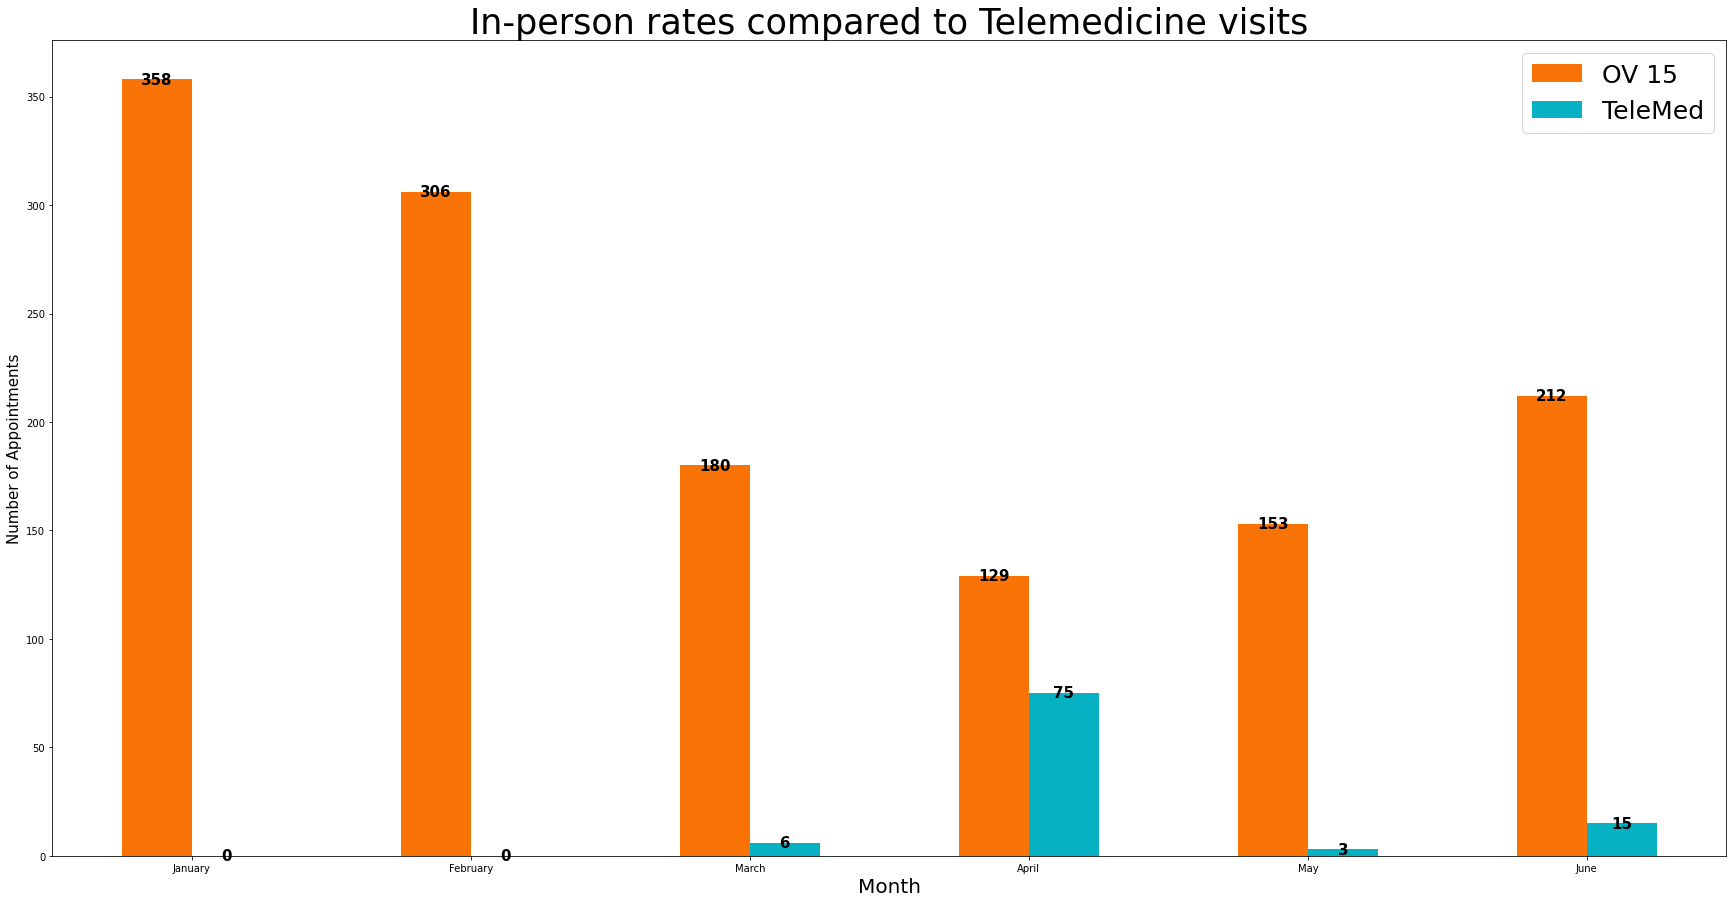

In [249]:
ax1 = tbm1.plot.bar(colormap=cm2, rot=0, figsize=(30,15))
_ = ax1.set_xlabel('Month', fontsize=20)
_ = ax1.set_ylabel('Number of Appointments', fontsize=15)
_ = ax1.set_title('In-person rates compared to Telemedicine visits', fontsize=35)
_ = ax1.set_xticklabels(months)
_ = ax1.legend(fontsize=25)

for p in ax1.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax1.text(x+width/2, 
            y+height, 
            '{:.0f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='k', fontsize=15, fontweight='bold')

plt.savefig('data/office_vs_tele_001.png')

In [207]:
df2 = df1.copy()
bin_labels = ['0-1','2-4','5-7','8-10','11-14','15-18','19+']
cut_bins = [-1, 1, 4, 7, 10, 14, 18, 25]
df2['age_group'] = pd.cut(df2['age'], bins=cut_bins, labels=bin_labels)
df2.sample(10)

,patientaccno,appttype,apptreason,apptstatus,dos,apptstarttime,age,dos_month,age_group
1778,107596,TeleMed,Sick,Seen in office,2020-04-16,2020-04-16 10:45:00,7,4,5-7
2677,109186,OV 15,NP CKUP,No Show,2020-06-22,2020-06-22 11:45:00,11,6,11-14
2017,104712,OV 15,physical and immunizations,Seen in office,2020-05-04,2020-05-04 12:30:00,10,5,8-10
182,108205,OV 15,physical and immunizations,Seen in office,2020-01-13,2020-01-13 11:00:00,2,1,2-4
530,108996,OV 15,Newborn Check,Seen in office,2020-01-31,2020-01-31 09:30:00,0,1,0-1
66,108507,OV 15,Follow up,Rescheduled,2020-01-03,2020-01-03 15:45:00,15,1,15-18
1917,103578,TeleMed,Recheck,Seen in office,2020-04-27,2020-04-27 15:00:00,17,4,15-18
1112,103371,OV 15,physical and immunizations,Cancelled,2020-03-02,2020-03-02 15:30:00,12,3,11-14
2615,101549,OV 15,physical and immunizations,Seen in office,2020-06-17,2020-06-17 09:00:00,14,6,11-14
384,101061,OV 15,ER Follow up,Seen in office,2020-01-24,2020-01-24 09:15:00,14,1,11-14


In [220]:
df2_6m = df2.copy()
df2_6m = df2_6m[~df2_6m['dos_month'].isin(['7','8'])]
status_by_ag = pd.DataFrame(df2_6m['apptstatus'].groupby(by=df2_6m['age_group']).value_counts())
status_by_ag
sbag = status_by_ag.unstack(fill_value=0)
sbag.columns = sbag.columns.droplevel(0)
sbag

apptstatus,Cancelled,No Show,Rescheduled,Seen in office
age_group,,,,
0-1,26,22,146,231
2-4,43,30,167,245
5-7,26,16,139,195
8-10,43,16,123,183
11-14,66,19,195,289
15-18,50,18,191,266
19+,9,7,9,28


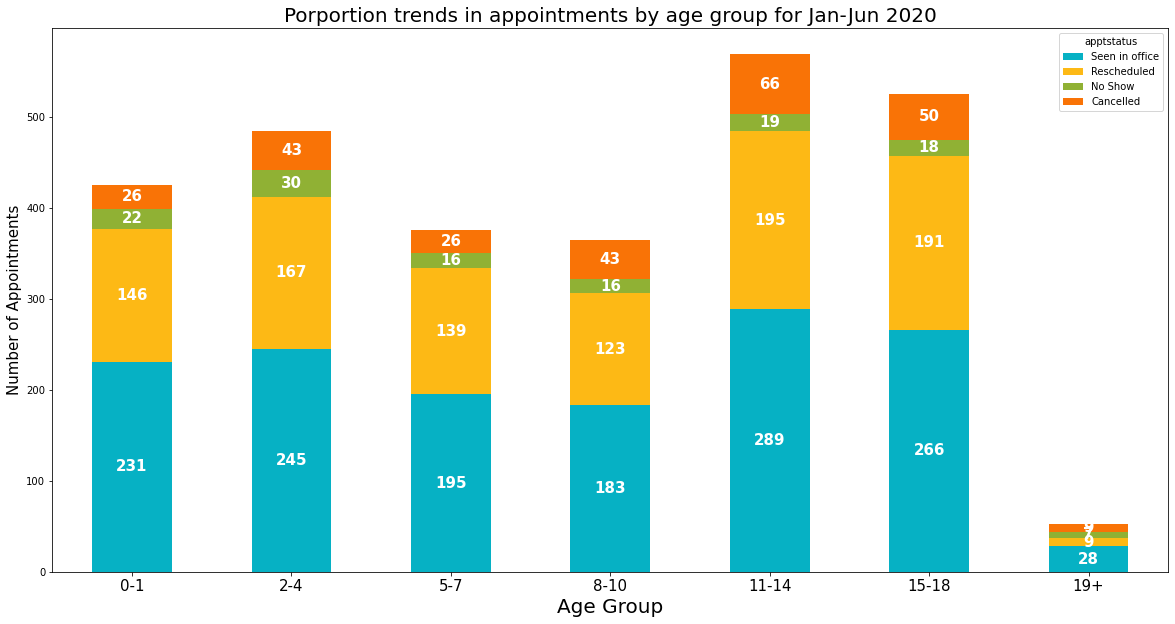

In [250]:
sbag = sbag[['Seen in office', 'Rescheduled', 'No Show','Cancelled']]
sbag

ax2 = sbag.plot.bar(stacked=True,colormap=cm, figsize=(20,10), rot=0)
_ = ax2.set_xlabel('Age Group', fontsize=20)
_ = ax2.set_ylabel('Number of Appointments', fontsize=15)
_ = ax2.set_title('Porportion trends in appointments by age group for Jan-Jun 2020', fontsize=20)
_ = ax2.set_xticklabels(bin_labels, fontsize=15)

for p in ax2.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax2.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='white', fontsize=15, fontweight='bold')


plt.savefig('data/stacked_by_age_001.png')

In [233]:
well_reason = ['physical and immunizations', 'NP CKUP', 'Sports Physical', 
               'physical and immunizations,Checkup','physical and immunizations,Recheck', 
               'ER Follow up,physical and immunizations']

df_well = df2_6m.loc[df2_6m['apptreason'].isin(well_reason)]
#df_well['apptreason'].value_counts()
df_sick = df2_6m.loc[~df2_6m['apptreason'].isin(well_reason)]
#df_sick['apptreason'].value_counts()

In [234]:
df_well.head()

,patientaccno,appttype,apptreason,apptstatus,dos,apptstarttime,age,dos_month,age_group
1,107740,OV 15,physical and immunizations,Seen in office,2020-01-02,2020-01-02 08:30:00,4,1,2-4
5,105363,OV 15,physical and immunizations,Rescheduled,2020-01-02,2020-01-02 09:00:00,9,1,8-10
6,107051,OV 15,physical and immunizations,Rescheduled,2020-01-02,2020-01-02 09:00:00,8,1,8-10
12,106768,OV 15,physical and immunizations,Rescheduled,2020-01-02,2020-01-02 10:00:00,9,1,8-10
17,108044,OV 15,physical and immunizations,Rescheduled,2020-01-02,2020-01-02 10:30:00,13,1,11-14


In [236]:
well_by_m = pd.DataFrame(df_well['apptstatus'].groupby(by=df_well['dos_month']).value_counts())
well_by_m
wbm = well_by_m.unstack(fill_value=0)
wbm.columns = wbm.columns.droplevel(0)
wbm1 = wbm[['Seen in office', 'Rescheduled', 'No Show','Cancelled']]
wbm1

apptstatus,Seen in office,Rescheduled,No Show,Cancelled
dos_month,,,,
1,116,82,10,11
2,87,95,12,10
3,64,93,10,22
4,101,137,19,16
5,91,123,7,17
6,125,117,10,25


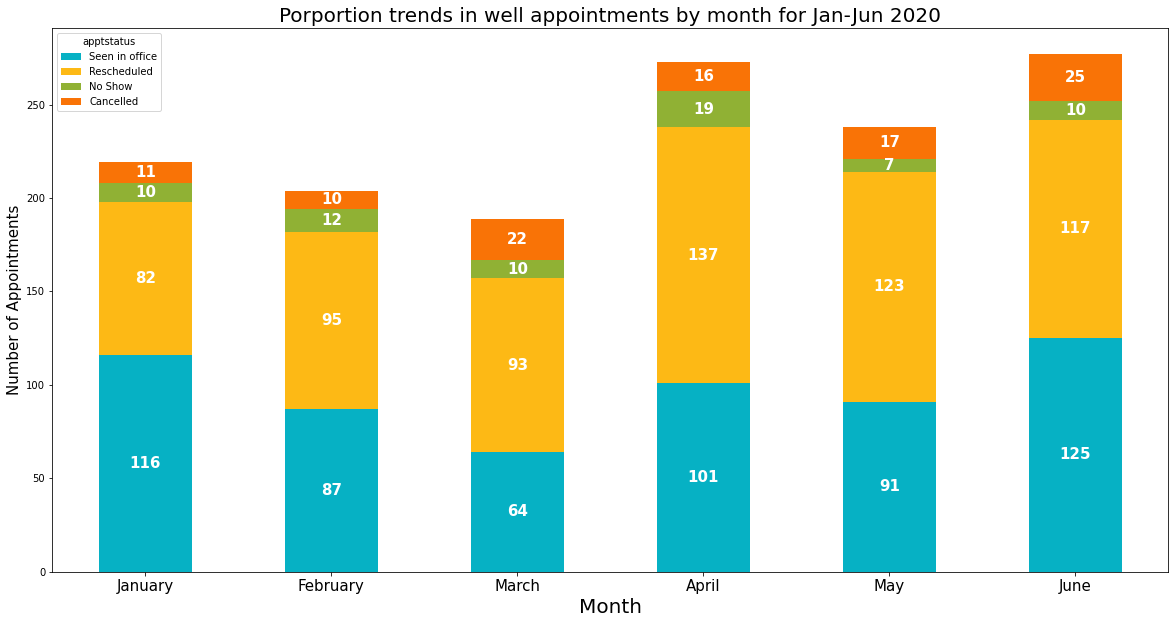

In [251]:
ax3 = wbm1.plot.bar(stacked=True,colormap=cm, figsize=(20,10), rot=0)
_ = ax3.set_xlabel('Month', fontsize=20)
_ = ax3.set_ylabel('Number of Appointments', fontsize=15)
_ = ax3.set_title('Porportion trends in well appointments by month for Jan-Jun 2020', fontsize=20)
_ = ax3.set_xticklabels(months, fontsize=15)

for p in ax3.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax3.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='white', fontsize=15, fontweight='bold')

plt.savefig('data/well_stacked_by_month_001.png')

In [240]:
sick_by_m = pd.DataFrame(df_sick['apptstatus'].groupby(by=df_sick['dos_month']).value_counts())
sibm = sick_by_m.unstack(fill_value=0)
sibm.columns = sibm.columns.droplevel(0)
sibm1 = sibm[['Seen in office', 'Rescheduled', 'No Show','Cancelled']]
sibm1

apptstatus,Seen in office,Rescheduled,No Show,Cancelled
dos_month,,,,
1,242,70,18,17
2,219,53,14,32
3,122,51,13,49
4,103,49,6,29
5,65,64,3,12
6,102,36,6,23


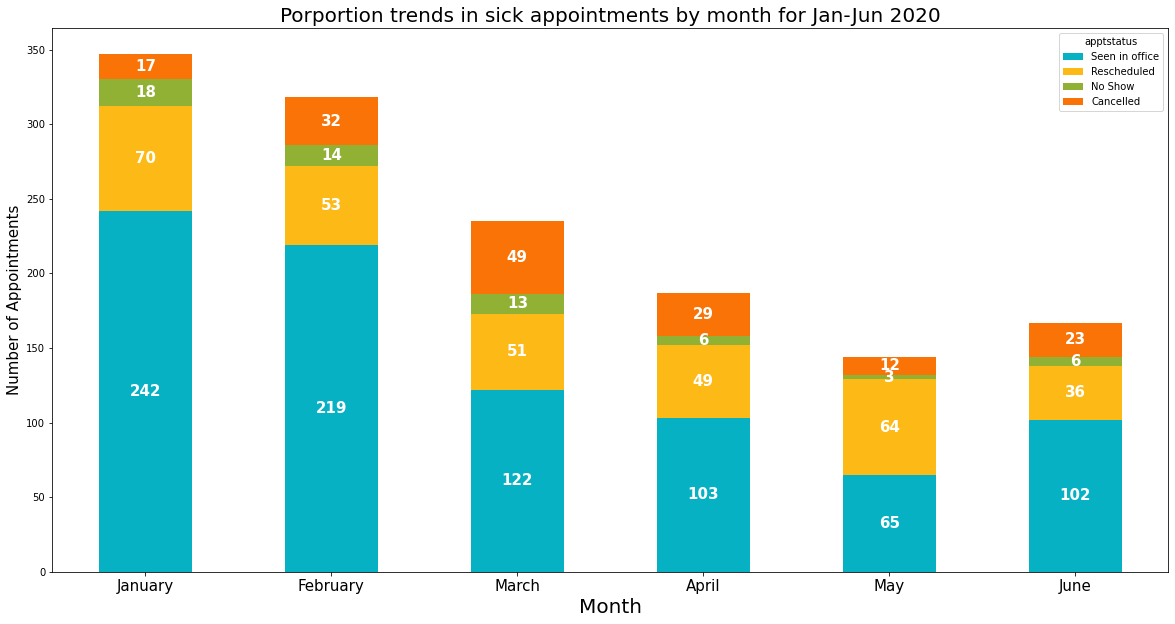

In [252]:
ax4 = sibm1.plot.bar(stacked=True,colormap=cm, figsize=(20,10), rot=0)
_ = ax4.set_xlabel('Month', fontsize=20)
_ = ax4.set_ylabel('Number of Appointments', fontsize=15)
_ = ax4.set_title('Porportion trends in sick appointments by month for Jan-Jun 2020', fontsize=20)
_ = ax4.set_xticklabels(months, fontsize=15)

for p in ax4.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax4.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='white', fontsize=15, fontweight='bold')

plt.savefig('data/sick_stacked_by_month_001.png')

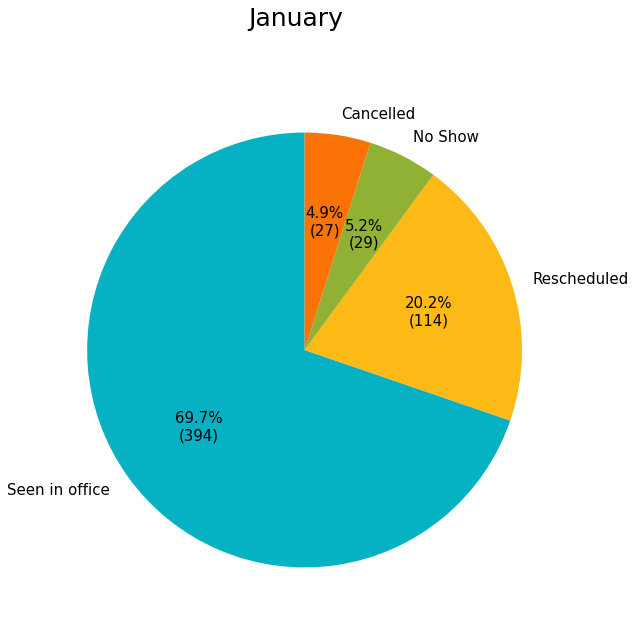

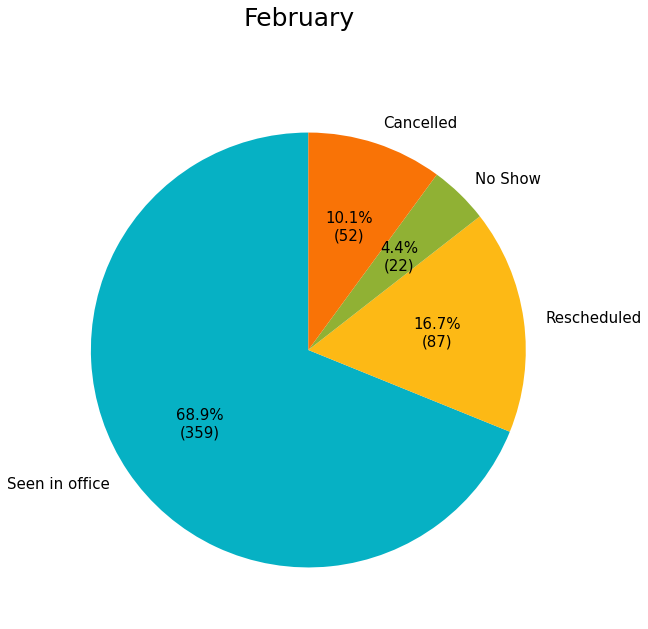

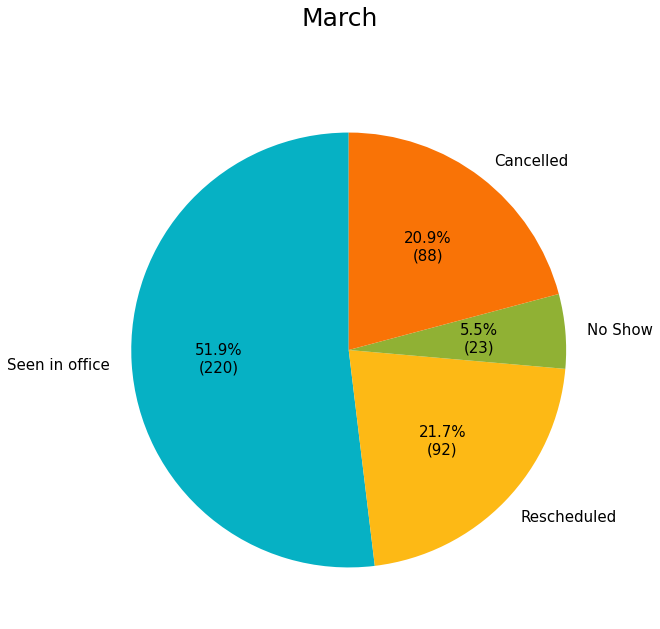

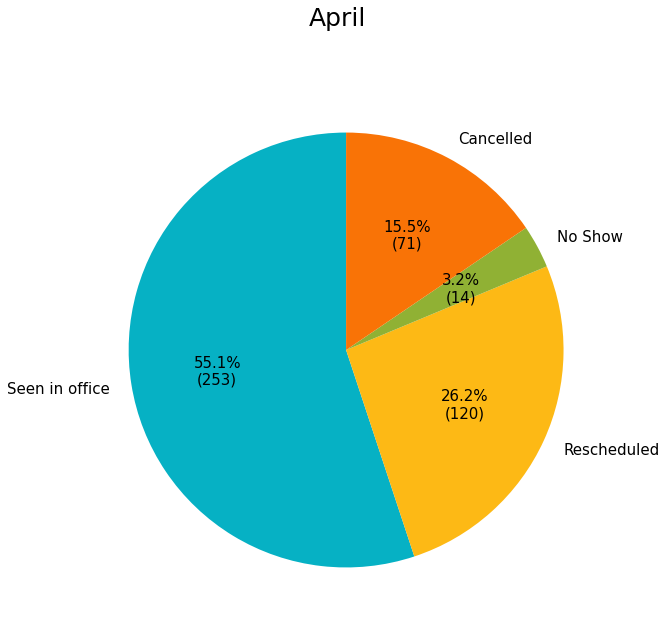

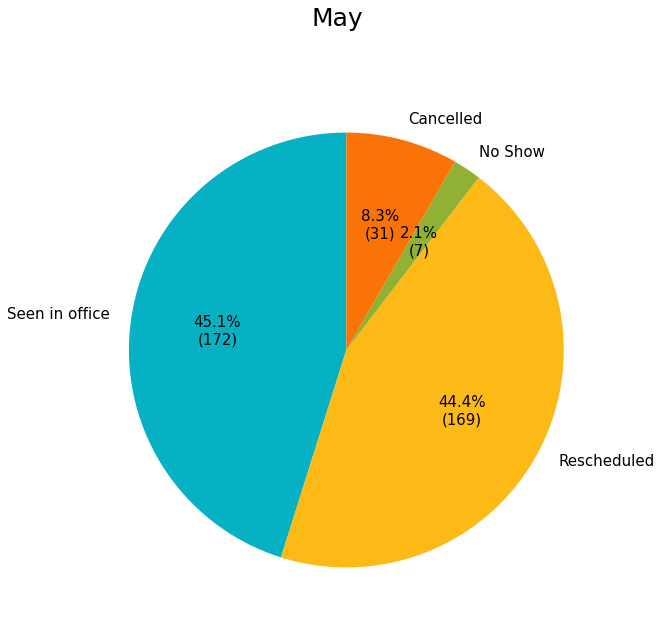

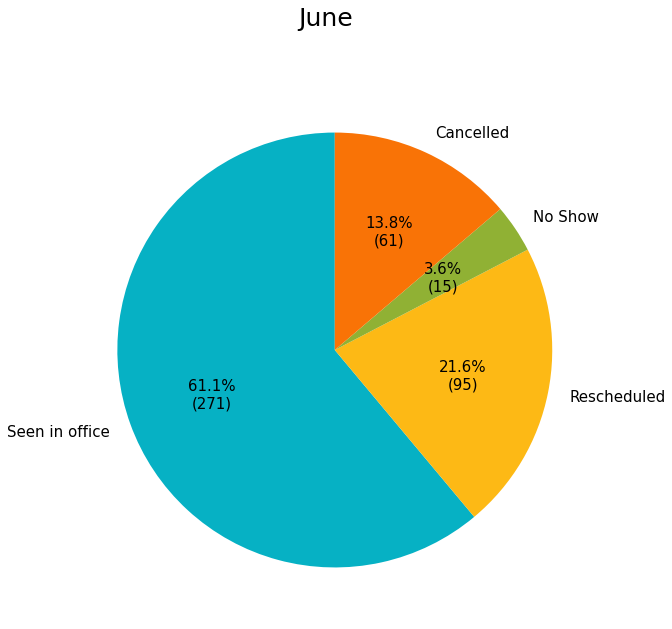

In [245]:
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

for i in range(len(months)):
    fig, ax = plt.subplots(figsize=(10,10))
    fig.suptitle(months[i], fontsize=25)
    _ = ax.pie(sibm1.iloc[i], autopct=lambda pct: func(pct, sbm.iloc[i]),
                labels=sibm1.columns, startangle=90,
                colors=colors, textprops={'fontsize': 15})
    _ = plt.xticks(size=20)

    plt.show()